# Social Media Sentiment Analysis
-  Based on their last 100 tweets, CBS News seems to show the most negative tweets.
-  Though CBS News shows a significant negative polarity, the most positive news outlet, BBC News, does not scew that far away from neutrality
-  Most tweets by the five news accounts analyzed seem to be neutral, as it can be noticed by the concentration of marks in the middle of the scatter plot

In [1]:
# Dependencies
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import json
import tweepy
from config import consumer_key, consumer_secret, access_token, access_token_secret
from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Find tweets that mention BBC, CBS, CNN, FOX and NYT
# Define search terms
target_users = ('BBCNews','CBSNews','CNN','FoxNews','nytimes')
results_list = []
tweets_ago = []
user_list = []

# loop through all users
for user in target_users:
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    counter = 0
        
    for x in range (1,6):
        public_tweets = api.user_timeline(user, page=x)
            
        for tweet in public_tweets:
            counter = counter + 1
            date = tweet["created_at"]
            text = tweet["text"]
            
            # Run Vader Sentiment Analysis on Each of the Samples
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
                
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            user_list.append(user)
            tweets_ago.append(counter)
            
    #Create a dictionaty of results
            user_results = {
            "Username": user,
            "Tweets Ago": counter,
            "Compound Score": compound,
            "Postive Score": pos,
            "Neutral Score": neu,
            "Negative Score": neg,
            "Date": date,
            "Text": text,
            }
# Append dictionary to list
            results_list.append(user_results)

In [4]:
# Create DataFrame from Results List
results_df = pd.DataFrame(results_list)
results_df.to_csv("output_df.csv")

# Divide by user
BBC_df = results_df.loc[results_df["Username"] == "BBCNews",:]
CNN_df = results_df.loc[results_df["Username"] == "CNN",:]
CBS_df = results_df.loc[results_df["Username"] == "CBSNews",:]
Fox_df = results_df.loc[results_df["Username"] == "FoxNews",:]
NYT_df = results_df.loc[results_df["Username"] == "nytimes",:]

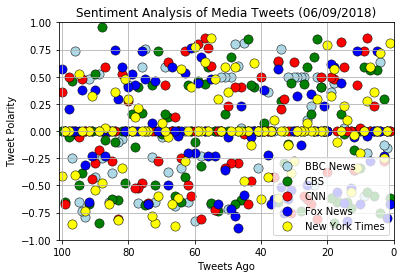

In [11]:
# Plot separately in scatter plot
bbc = plt.scatter(BBC_df['Tweets Ago'],BBC_df['Compound Score'],
                  facecolor='lightblue',s=85,edgecolors="black",linewidth =.5)
cbs = plt.scatter(CBS_df['Tweets Ago'],CBS_df['Compound Score'],
                 facecolor='green',s=85,edgecolors="black",linewidth =.5)
cnn = plt.scatter(CNN_df['Tweets Ago'],CNN_df['Compound Score'],
                 facecolor='red',s=85,edgecolors="black",linewidth =.5)
fox = plt.scatter(Fox_df['Tweets Ago'],Fox_df['Compound Score'],
                 facecolor='blue',s=85,edgecolors="black",linewidth =.5)
nyt = plt.scatter(NYT_df['Tweets Ago'],NYT_df['Compound Score'],
                 facecolor='yellow',s=85,edgecolors="black",linewidth =.5)
# Format
plt.title('Sentiment Analysis of Media Tweets (06/09/2018)')
plt.xlim(BBC_df['Username'].count() + 1,0)
plt.xlabel('Tweets Ago')
plt.ylim(-1,1)
plt.ylabel('Tweet Polarity')
lgnd = plt.legend((bbc,cbs,cnn,fox,nyt),
           ('BBC News', 'CBS', 'CNN','Fox News','New York Times'),
           loc='lower right')

plt.grid()
plt.savefig("scatter.png")
plt.show()

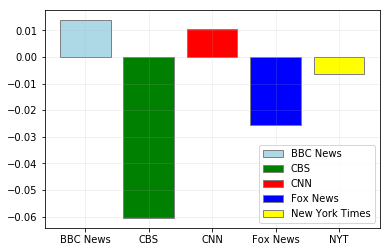

In [6]:
# Get means
grouped = [BBC_df['Compound Score'].mean(),
           CBS_df['Compound Score'].mean(),
          CNN_df['Compound Score'].mean(),
          Fox_df['Compound Score'].mean(),
          NYT_df['Compound Score'].mean()]

# Plot in bar graph
BBC = plt.bar('BBC News',BBC_df['Compound Score'].mean(),color='lightblue',edgecolor='grey')
CBS = plt.bar('CBS',CBS_df['Compound Score'].mean(),color='green',edgecolor='grey')
CNN = plt.bar('CNN',CNN_df['Compound Score'].mean(),color='red',edgecolor='grey')
FOX = plt.bar('Fox News',Fox_df['Compound Score'].mean(),color='blue',edgecolor='grey')
NYT = plt.bar('NYT',NYT_df['Compound Score'].mean(),color='yellow',edgecolor='grey')
lgnd = plt.legend((BBC,CBS,CNN,FOX,NYT),
           ('BBC News', 'CBS', 'CNN','Fox News','New York Times'),
           loc='best',)

plt.grid(alpha=0.2)
plt.savefig("bar_chart.png")
plt.show()